## Part 2: Clinical Application

### Contents
Fill out this notebook as part 2 of your final project submission.

**You will have to complete the Code (Load Metadata & Compute Resting Heart Rate) and Project Write-up sections.**  

- [Code](#Code) is where you will implement some parts of the **pulse rate algorithm** you created and tested in Part 1 and already includes the starter code.
  - [Imports](#Imports) - These are the imports needed for Part 2 of the final project. 
    - [glob](https://docs.python.org/3/library/glob.html)
    - [os](https://docs.python.org/3/library/os.html)
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
  - [Load the Dataset](#Load-the-dataset)  
  - [Load Metadata](#Load-Metadata)
  - [Compute Resting Heart Rate](#Compute-Resting-Heart-Rate)
  - [Plot Resting Heart Rate vs. Age Group](#Plot-Resting-Heart-Rate-vs.-Age-Group)
- [Project Write-up](#Project-Write-Up) to describe the clinical significance you observe from the **pulse rate algorithm** applied to this dataset, what ways/information that could improve your results, and if we validated a trend known in the science community. 

### Dataset (CAST)

The data from this project comes from the [Cardiac Arrythmia Suppression Trial (CAST)](https://physionet.org/content/crisdb/1.0.0/), which was sponsored by the National Heart, Lung, and Blood Institute (NHLBI). CAST collected 24 hours of heart rate data from ECGs from people who have had a myocardial infarction (MI) within the past two years.<sup>1</sup> This data has been smoothed and resampled to more closely resemble PPG-derived pulse rate data from a wrist wearable.<sup>2</sup>

1. **CAST RR Interval Sub-Study Database Citation** - Stein PK, Domitrovich PP, Kleiger RE, Schechtman KB, Rottman JN. Clinical and demographic determinants of heart rate variability in patients post myocardial infarction: insights from the Cardiac Arrhythmia Suppression Trial (CAST). Clin Cardiol 23(3):187-94; 2000 (Mar)
2. **Physionet Citation** - Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

-----

### Code
#### Imports

When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages are imported for you here. We recommend you don't import other packages outside of the [Standard Library](https://docs.python.org/3/library/) , otherwise the grader might not be able to run your code.

In [2]:
import glob
import os

import numpy as np
import pandas as pd

#### Load the dataset

The dataset is stored as [.npz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html) files. Each file contains roughly 24 hours of heart rate data in the 'hr' array sampled at 1Hz. The subject ID is the name of the file. You will use these files to compute resting heart rate.

Demographics metadata is stored in a file called 'metadata.csv'. This CSV has three columns, one for subject ID, age group, and sex. You will use this file to make the association between resting heart rate and age group for each gender.

Find the dataset in `../datasets/crisdb/`

In [3]:
hr_filenames = glob.glob('datasets/crisdb/*.npz')

#### Load Metadata
Load the metadata file into a datastructure that allows for easy lookups from subject ID to age group and sex.

In [11]:
metadata_filename = 'datasets/crisdb/metadata.csv'

metadata = pd.read_csv(filepath_or_buffer=metadata_filename)

#### Compute Resting Heart Rate
For each subject we want to compute the resting heart rate while keeping track of which age group this subject belongs to. An easy, robust way to compute the resting heart rate is to use the lowest 5th percentile value in the heart rate timeseries.

In [12]:
def AgeAndRHR(metadata, filename):

    # Load the heart rate timeseries
    hr_data = np.load(filename)['hr']
    
    # Compute the resting heart rate from the timeseries by finding the lowest 5th percentile value in hr_data
    rhr = np.percentile(a=hr_data, q=5)

    # Find the subject ID from the filename.
    subject = filename.split('/')[-1].split('.')[0]
    
    # get all metadata information for this subject:
    df_subject = metadata[metadata['subject']==subject]
    assert df_subject.shape[0]==1, 'Found more than 1 entry for subject {subject} in metadata DataFrame'

    # Find the age group for this subject in metadata.
    age_group = df_subject['age'].iloc[0]
    
    # Find the sex for this subject in metadata.
    sex = df_subject['sex'].iloc[0]

    return age_group, sex, rhr

df = pd.DataFrame(data=[AgeAndRHR(metadata=metadata, filename=filename) for filename in hr_filenames],
                  columns=['age_group', 'sex', 'rhr'])

#### Plot Resting Heart Rate vs. Age Group
We'll use [seaborn](https://seaborn.pydata.org/) to plot the relationship. Seaborn is a thin wrapper around matplotlib, which we've used extensively in this class, that enables higher-level statistical plots.

We will use [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) to plot the mean of the resting heart rates for each age group along with the 95% confidence interval around the mean. Learn more about making plots that show uncertainty [here](https://seaborn.pydata.org/tutorial/relational.html#aggregation-and-representing-uncertainty).

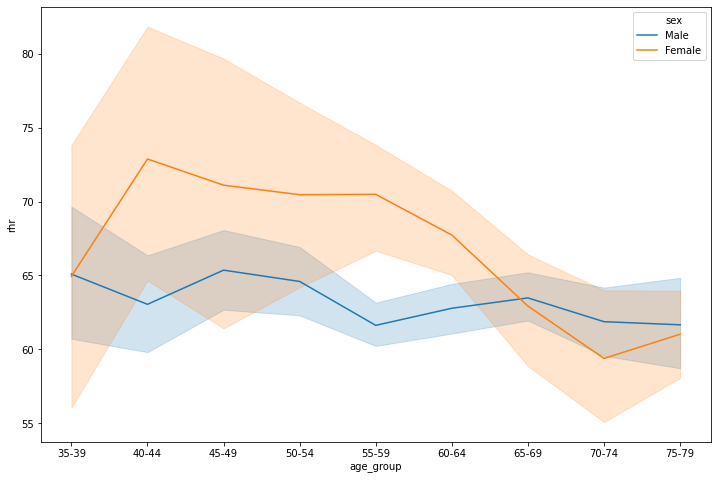

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

labels = sorted(np.unique(df.age_group))
df['xaxis'] = df['age_group'].map(lambda x: labels.index(x)).astype('float')
plt.figure(figsize=(12, 8))
sns.lineplot(x='age_group', y='rhr', hue='sex', data=df)
_ = plt.xticks(np.arange(len(labels)), labels)

Take a look at number of samples:

Text(0, 0.5, 'frequency')

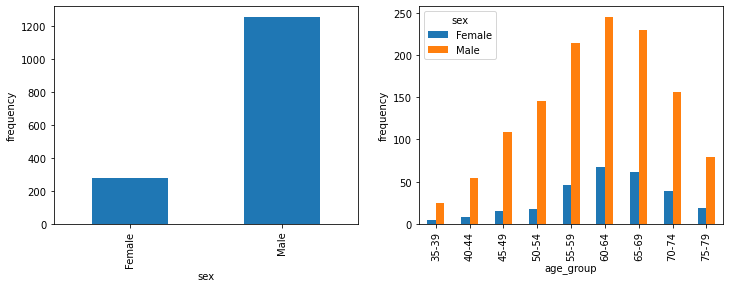

In [21]:
figure, axarr = plt.subplots(1, 2, figsize=(12, 4))
df.groupby('sex').size().plot(kind='bar', ax=axarr[0])
axarr[0].set_ylabel('frequency')
df.groupby(['age_group', 'sex']).size().unstack().plot(kind='bar', ax=axarr[1])
axarr[1].set_ylabel('frequency')

### Clinical Conclusion
Answer the following prompts to draw a conclusion about the data.
> 1. For women, we see .... 
> 2. For men, we see ... 
> 3. In comparison to men, women's heart rate is .... 
> 4. What are some possible reasons for what we see in our data?
> 5. What else can we do or go and find to figure out what is really happening? How would that improve the results?
> 6. Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? How?

Your write-up will go here...

1. For women, we see a significant increase in resting heart rate from ages 35 to 44, then a slight decline from until age 59 and finally a significant decline.
   We see a relatively large confidence interval, especially from ages 40 to 59. This might be mostly due to the low number of female subjects in each age group.
   It might be that the female resting heart range could easily be 5-10 bpm higher or lower than average.

2. For men, we see a minor increase in heart rate around age group 45-49 and and a slight decline in age groups >= 65 years.
   We notice a relatively thin confidence interval. This might be due to relatively large datasets. For low and high age groups the subject sizes decrase and the confidence intervals broaden.

3. In comparison to men, women's mean resting heart rate is higher from ages 40 to about 65. Additionally, females have a much wider confidence interval around their average heart rate values compared to men. The trend that average resting heart rate increases up until middle age and then decreases into old age is more significant in women.

4. Possible reasons for what we see in the data:     
    - Women have a smaller heart than men. Their heart has to beat faster to achieve a similar blood flow (source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4190707/). 
    - "Women have a different intrinsic rhythmicity to the pacemaker of their hearts, which causes them to beat faster" (source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4190707/).
    - Menopause may also be a reason for a change in resting heart rate in women's hearts.
    - We get broader 95%-confidence intervals in an age group mostly due to a smaller data set

5. To determin the trend of the resting heart rate over different age groups and gender it is important to have a suitable dataset. The considered CAST dataset might have a bias due to its subject selection process. The dataset only contains subjects that have had myocardial infarction (MI) within the past two years. This obviously leads to biases in gender selection (the dataset has about 5 times more male subjects than female subjects) and most of the subjects are of age 50-69. The lack of data might be the main reason for the broader confidence intervals in these regimes.  
Results might improve if we consider more datapoints, especially of female subjects, age ranges below 50 years and above 70 years and subjects that have no precondition of MI.

6. We can validate the trend that average resting heart rate increases up until middle age and then decreases into old age, only to some degree.
The underlying CAST dataset is not sufficient for this task due to the data selection process (precondition MI) and lack of (especially) female subjects and lack of subjects outside of the age range 50-69 years.
However we might get some idea that this trend might be there, especially considering the female resting heart rate curve and the the slight decreasing curve for the male subjects from the middle to old age range.
However, because of the relatively large 95%-confidence intervals it would be wrong to fully validate this trend based on the available data.